In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import calendar #to convert month number to month name

D = pd.read_csv('D:\Desktop\Project\FlightSalesClean.csv')
print('loading Dataset Compelete!')

loading Dataset Compelete!


In [2]:
#this function is to show values on chart's bars

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:
#this function helps us have a better look of pie chart and doesn't show ALL percentages
def autopct_more_than_3(pct):
    return ('%1.f%%' % pct) if pct > 3 else ''


In [4]:
#we make this list for later, to sort the charts by months name(default chart sort is alphabetically)
order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    

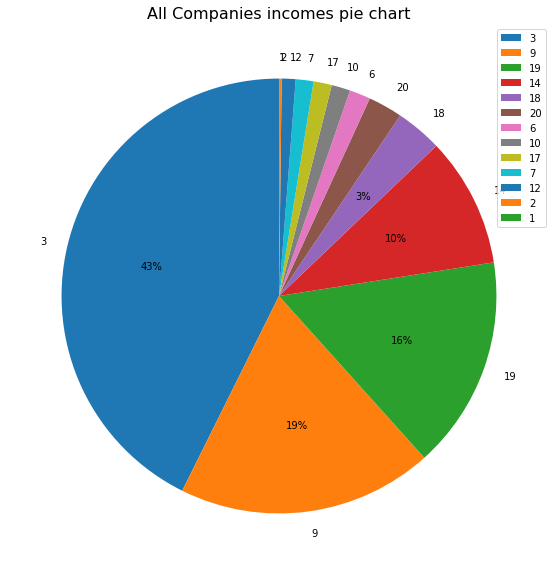

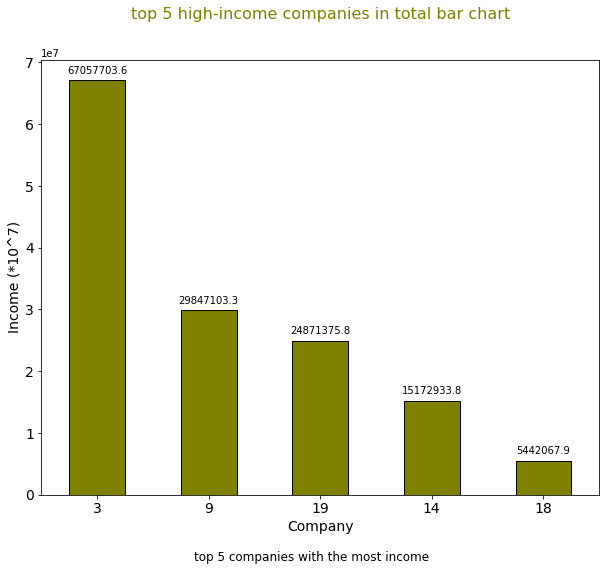

the high-income companies and their total incomes are:
    company  Total Income
0        3  6.705770e+07
1        9  2.984710e+07
2       19  2.487138e+07
3       14  1.517293e+07
4       18  5.442068e+06


In [5]:
# incomes totally

sum_price = D.groupby('company')['price'].sum()   #how much each company has earned in total
sum_price = sum_price.sort_values(ascending=False)  #sort compaies based on their income 

#plot all companies incomes

sum_price.plot.pie(figsize = (10,10) , autopct=autopct_more_than_3, startangle=90 )
plt.ylabel('')
plt.legend(loc="best")
plt.title( "All Companies incomes pie chart", horizontalalignment='center', fontsize=16 )
plt.show()

#plot top 5 companies with the most income
total_incm_plot = sum_price[:5].plot.bar(rot=0,figsize = (10,8) , color = 'olive', fontsize = 14,edgecolor="black")
plt.figtext(0.5, 0.01, "top 5 companies with the most income", wrap=True, horizontalalignment='center', fontsize=12)
plt.title('top 5 high-income companies in total bar chart' , fontsize = 16 , color = 'olive',y = 1.08)
plt.ylabel('Income (*10^7)',fontsize=14)
plt.xlabel('Company' , fontsize=14)
add_value_labels(total_incm_plot)
plt.show()



#for printing the result in good look:
Tincm_printable_table = sum_price[:5].to_frame().reset_index()
Tincm_printable_table .rename(columns = {'price':'Total Income'} , inplace = True) #change the column name
print('the high-income companies and their total incomes are:\n',Tincm_printable_table)




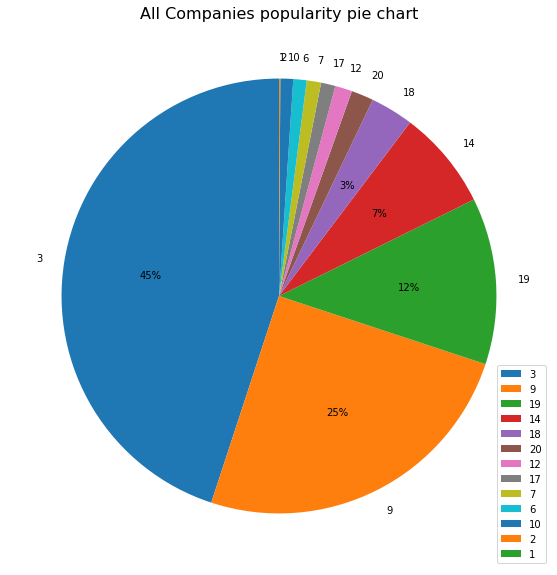

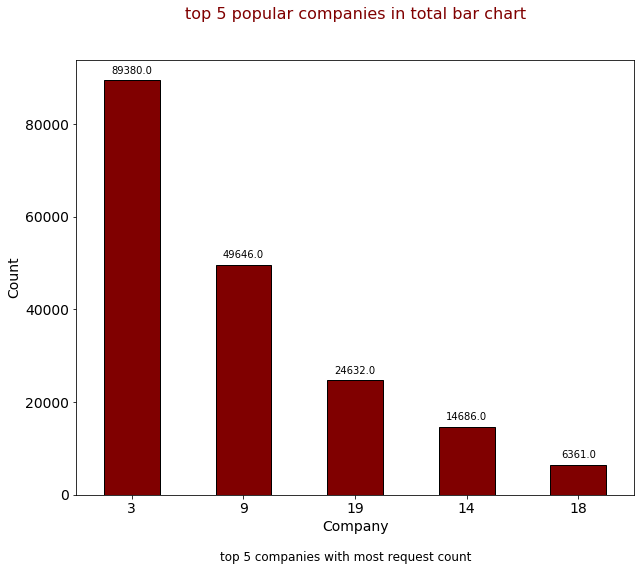

the most popular companies and their total request counts are:
    company  Total  request count
0        3                 89380
1        9                 49646
2       19                 24632
3       14                 14686
4       18                  6361


In [6]:
#popularity totally


#how many times each company has been used?
sum_count = D['company'].value_counts() 

#plot all compabies in popularity
sum_count.plot.pie(figsize=(10, 10),autopct=autopct_more_than_3, startangle=90 )
plt.legend(loc="best")
plt.ylabel('')
plt.title( "All Companies popularity pie chart", horizontalalignment='center', fontsize=16 )
plt.show()


#plot top 5 popular companies
total_count_plot = sum_count[:5].plot.bar(rot=0 , figsize = (10,8),color ='maroon' , fontsize = 14,edgecolor="black")
plt.title( "top 5 popular companies in total bar chart", horizontalalignment='center', fontsize=16  , color = 'maroon' , y =1.08)
plt.figtext(0.5, 0.01, "top 5 companies with most request count", wrap=True, horizontalalignment='center', fontsize=12)
plt.xlabel('Company' , fontsize = 14 )
plt.ylabel('Count' , fontsize = 14)
add_value_labels(total_count_plot)
plt.show()


#for printing the result in good look:
Tcnt_printable_table = sum_count[:5].to_frame().reset_index()
Tcnt_printable_table .rename(columns = {'index':'company' , 'company' : 'Total  request count'} , inplace = True) #change the columns name
print('the most popular companies and their total request counts are:\n',Tcnt_printable_table)




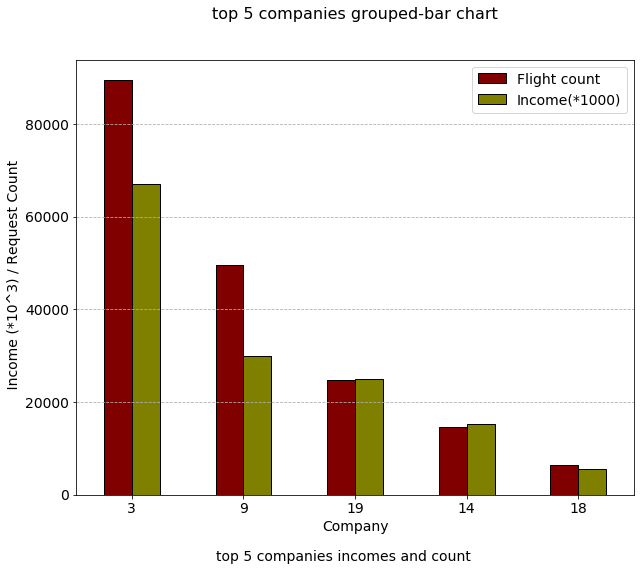

top 5 companies and thier counts and total incomes are 
    Company  Income(*1000)  Flight count
0        3   67057.703627         89380
1        9   29847.103294         49646
2       19   24871.375758         24632
3       14   15172.933842         14686
4       18    5442.067917          6361


In [7]:
#plot the last two plots together for a better look

#convert two series fisrt 5 rows to df to plot grouped bar chart
sum_price_df = sum_price[:5].to_frame().reset_index()

#there is too much difference between price values and count,if we plot it directly cout bar will be so small, so we divide all prices by 10^3
sum_price_df['price'] = sum_price_df['price']/10**3

#rename columns for mereging and for a better legend on final chart
sum_price_df.columns=['index','Income(*1000)']


sum_count_df = sum_count[:5].to_frame().reset_index()
sum_count_df.columns=['index','Flight count']

#merge dfs of source and destination:
MERGE_price_count =sum_price_df.merge(sum_count_df)



#plot
MERGE_price_count.plot(rot = 0 ,x="index", y=["Flight count", "Income(*1000)"], kind="bar", edgecolor="black",color = ['maroon', 'olive'],fontsize = 14 ,figsize = (10,8))
plt.title('top 5 companies grouped-bar chart' , fontsize = 16 , y=1.08)
plt.figtext(0.5,  0.01, "top 5 companies incomes and count ", wrap=True, horizontalalignment='center', fontsize=14)
plt.ylabel(' Income (*10^3) / Request Count' , fontsize = 14)
plt.xlabel('Company' , fontsize = 14)
plt.legend(fontsize = 14)
plt.grid(b=None, which='major' , axis='y',linestyle='--')
plt.show()

#print the result with good look
MERGE_price_count.rename(columns = {'index':'Company'}, inplace = True) #change the column name
print('top 5 companies and thier counts and total incomes are \n',MERGE_price_count)




In [8]:
    # 1 - dependency to month 

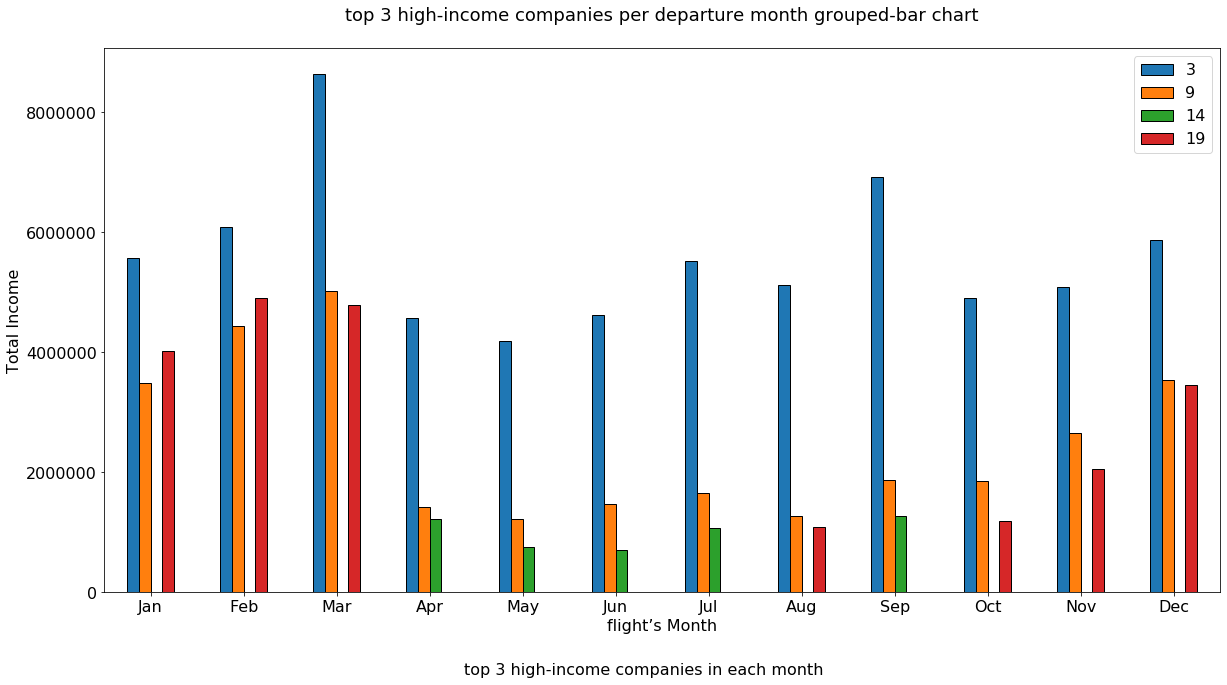

top 3 high-income companies and their total income per flight’s month is:


price
month number month company              
1            Jan   3        5.575925e+06
                   9        3.487689e+06
                   19       4.018635e+06
2            Feb   3        6.084457e+06
                   9        4.427950e+06
                   19       4.895635e+06
3            Mar   3        8.630503e+06
                   9        5.014383e+06
                   19       4.789328e+06
4            Apr   3        4.568169e+06
                   9        1.417803e+06
                   14       1.213713e+06
5            May   3        4.181445e+06
                   9        1.213442e+06
                   14       7.556091e+05
6            Jun   3        4.612623e+06
                   9        1.459688e+06
                   14       7.003861e+05
7            Jul   3        5.519292e+06
                   9        1.657038e+06
                   14       1.065647e+06
8            Aug   3        5.123045e+06
                   9        1.270561e+06
                   19       1.076566e+06
9            Sep   3        6.909997e+06
                   9        1.868953e+06
                   14       1.259757e+06
10           Oct   3        4.903108e+06
                   9        1.851478e+06
                   19       1.189343e+06
11           Nov   3        5.078356e+06
                   9        2.649664e+06
                   19       2.056460e+06
12           Dec   3        5.870784e+06
                   9        3.528454e+06
                   19       3.443014e+06

In [9]:
#1.1 - income per month

filtered_D = D[['month','price','company']] #seperate columns we need

#how much each company has earned totally each month
companies_income_per_month = filtered_D.groupby(['month' , 'company'])['price'].sum().reset_index() 

#add this column to print finall table in month order
companies_income_per_month['month number'] = companies_income_per_month['month'].astype('Int64')

#converting month number to month name
companies_income_per_month['month'] = companies_income_per_month['month'].apply(lambda x: calendar.month_abbr[x])


#seperate companies_income_per_month DataFrame into 12 DFs, one for each month, this is a list of DFs
df_month_price_list = [pd.DataFrame(y) for x, y in companies_income_per_month.groupby('month', as_index=False)]


#we need an empty DF to append clean data into, so we can plot it
company_income_month = pd.DataFrame(columns = ['month' , 'company' , 'price']) 


#df_month_price_list is a list of DFs. we have to do some editing on each DF in this list
for i in df_month_price_list:
    i.sort_values(by = 'price' , ascending = False , inplace = True) #sort each DF in list
    i = i.head(3) #keep top 3 company with the most income each month
    company_income_month = company_income_month.append(i , ignore_index=True ,  sort = True) #we do this so we can plot it in the end

company_income_month.sort_values(by = 'month number' , inplace = True)

#plot
company_income_month.pivot("month", "company", "price").loc[order].plot(figsize=(20,10) , edgecolor="black",kind='bar', rot=0 , fontsize= 16)
plt.xlabel('flight’s Month' , fontsize= 16)
plt.legend(fontsize = 16)
plt.title('top 3 high-income companies per departure month grouped-bar chart', fontsize = 18 , y = 1.04)
plt.figtext(0.5, 0.01, "top 3 high-income companies in each month", wrap=True, horizontalalignment='center', fontsize=16)
plt.ylabel('Total Income', fontsize= 16)
plt.show()

#let's print a beautiful data table



printable_incm_table = company_income_month.groupby(['month number','month', 'company']).agg({'price':'sum'})
print('top 3 high-income companies and their total income per flight’s month is:')
printable_incm_table

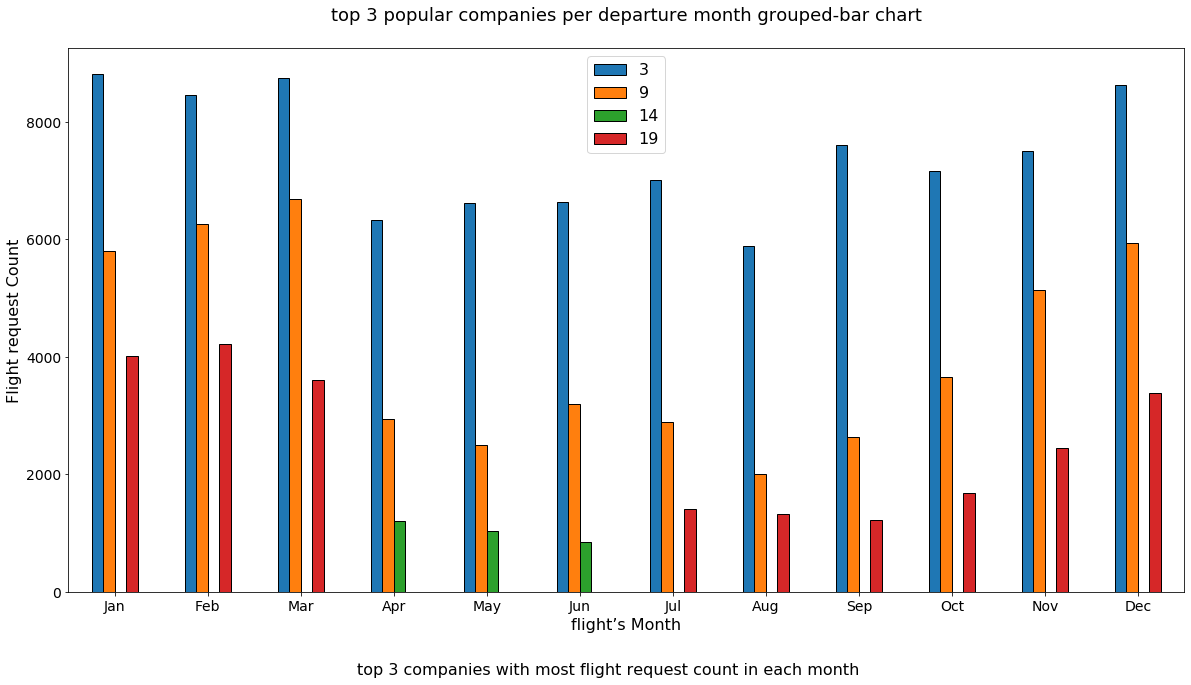

top 3 popular companies and their total request count in each flight’s month is:


count
month number month company       
1            Jan   3         8806
                   9         5805
                   19        4006
2            Feb   3         8450
                   9         6260
                   19        4218
3            Mar   3         8746
                   9         6681
                   19        3611
4            Apr   3         6335
                   9         2943
                   14        1202
5            May   3         6610
                   9         2507
                   14        1044
6            Jun   3         6635
                   9         3195
                   14         847
7            Jul   3         7002
                   9         2888
                   19        1416
8            Aug   3         5888
                   9         2001
                   19        1334
9            Sep   3         7609
                   9         2638
                   19        1223
10           Oct   3         7165
                   9         3660
                   19        1692
11           Nov   3         7503
                   9         5136
                   19        2443
12           Dec   3         8631
                   9         5932
                   19        3386

In [10]:
#1.2 - popularity per month

#seperate columns we need
filtered_D2 = D[['month','company']]

#how many times a company has been used totally each month
companies_count_per_month = filtered_D2.groupby(['month','company'])['month'].count().reset_index(name='count')

#add this column to print finall table in month order
companies_count_per_month['month number'] = companies_count_per_month['month'].astype('Int64')


#converting month number to month name
companies_count_per_month['month'] = companies_count_per_month['month'].apply(lambda x: calendar.month_abbr[x])


#seperate companies_count_per_month DataFrame into n DFs, one for each month, this is a list of DFs
df_month_count_list = [pd.DataFrame(y) for x, y in companies_count_per_month.groupby(['month'], as_index=False)]

#we need an empty DF to append clean data into, so we can plot it
company_count_month = pd.DataFrame(columns = ['month' , 'company' , 'count'])



#df_month_count_list is a list of DFs. we have to do some editing on each DF in this list
for i in df_month_count_list:
    i.sort_values(by = 'count' , ascending = False , inplace = True) #sort each DF in list
    i = i.head(3) #keep top 3 popular company in each month
    company_count_month = company_count_month.append(i , ignore_index=True , sort = True ) #append them all to this so we can plot it

#plot    
company_count_month.pivot("month", "company", "count").loc[order].plot(figsize=(20,10) , kind='bar', edgecolor="black",rot=0 , fontsize= 14)
plt.xlabel('flight’s Month' , fontsize= 16)
plt.legend(fontsize = 16)
plt.title('top 3 popular companies per departure month grouped-bar chart', fontsize = 18 , y = 1.04)
plt.figtext(0.5, 0.01, "top 3 companies with most flight request count in each month", wrap=True, horizontalalignment='center', fontsize=16)
plt.ylabel('Flight request Count', fontsize= 16)
plt.show()


#let's print a beautiful data table
printable_cnt_table = company_count_month.groupby(['month number','month', 'company']).agg({'count':'sum'})
print('top 3 popular companies and their total request count in each flight’s month is:')
printable_cnt_table

In [11]:
    #2 - dependency to source

In [16]:
#2.1 - income per source

filtered_D3 = D[['source','price','company']] #seperate columns we need

#how much each company has earned totally each source
companies_income_per_source = filtered_D3.groupby(['source' , 'company'])['price'].sum().reset_index() 

#seperate companies_income_per_source DataFrame into 12 DFs, one for each month, this is a list of DFs
df_source_price_list = [pd.DataFrame(y) for x, y in companies_income_per_source.groupby('source', as_index=False)]

#we need an empty DF to append clean data into, so we can plot it
company_income_source = pd.DataFrame(columns = ['source' , 'company' , 'price']) 



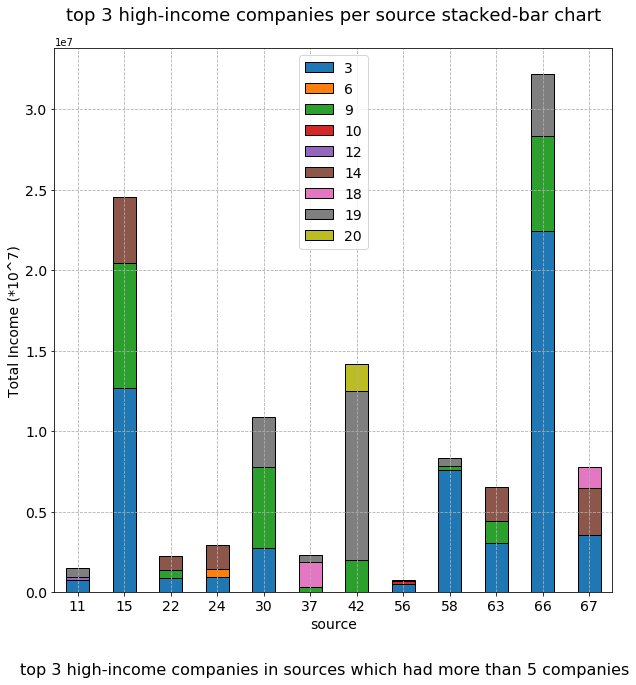

top 3 high-income companies and their total income in each source is:


price
source company              
11     3        7.504900e+05
       12       1.994336e+05
       19       5.397208e+05
15     3        1.266715e+07
       9        7.815038e+06
       14       4.076405e+06
22     3        8.507914e+05
       9        5.281164e+05
       14       8.817314e+05
24     3        9.620909e+05
       6        4.605590e+05
       14       1.519706e+06
30     3        2.713554e+06
       9        5.060924e+06
       19       3.124986e+06
37     9        3.416752e+05
       18       1.546751e+06
       19       4.100965e+05
42     9        2.015657e+06
       19       1.048932e+07
       20       1.670476e+06
56     3        4.668788e+05
       10       1.946350e+05
       20       1.051376e+05
58     3        7.595144e+06
       9        2.245869e+05
       19       4.825698e+05
63     3        3.018580e+06
       9        1.388791e+06
       14       2.106919e+06
66     3        2.244777e+07
       9        5.879729e+06
       19       3.854652e+06
67     3        3.524478e+06
       14       2.931094e+06
       18       1.303642e+06

In [17]:
#df_source_price_list is a list of DFs. we have to do some editing on each DF in this list

#since total source numbers is too much we neglect sources that had used less than 5 companies

#but we put the neglected sources and their companies in another DF for more analysis:
poor_sorce = pd.DataFrame(columns = ['source' , 'company' , 'price'])


for i in df_source_price_list:
    if i.shape[0] < 5:  
        poor_sorce = poor_sorce.append(i , ignore_index=True)
        continue
    i.sort_values(by = 'price' , ascending = False , inplace = True) #sort each DF in list
    i = i.head(3) #keep top 3 company with the most income in each source
    company_income_source = company_income_source.append(i , ignore_index=True) #we do this so we can plot it in the end
    
    
#plot
company_income_source.pivot("source", "company", "price").plot(figsize=(10,10) , edgecolor="black",kind='bar', rot=0 , fontsize= 14 , stacked = True)
plt.xlabel('source' , fontsize= 14)
plt.legend(fontsize = 14)
plt.title('top 3 high-income companies per source stacked-bar chart', fontsize = 18 , y = 1.04)
plt.figtext(0.5, 0.01, "top 3 high-income companies in sources which had more than 5 companies", wrap=True, horizontalalignment='center', fontsize=16)
plt.ylabel('Total Income (*10^7)', fontsize= 14)
plt.grid(b=None, which='major' , axis='both',linestyle='--')
plt.show()



#let's print a beautiful data table
printable_incm_table_src = company_income_source.groupby(['source', 'company']).agg({'price':'sum'})
print('top 3 high-income companies and their total income in each source is:')
printable_incm_table_src


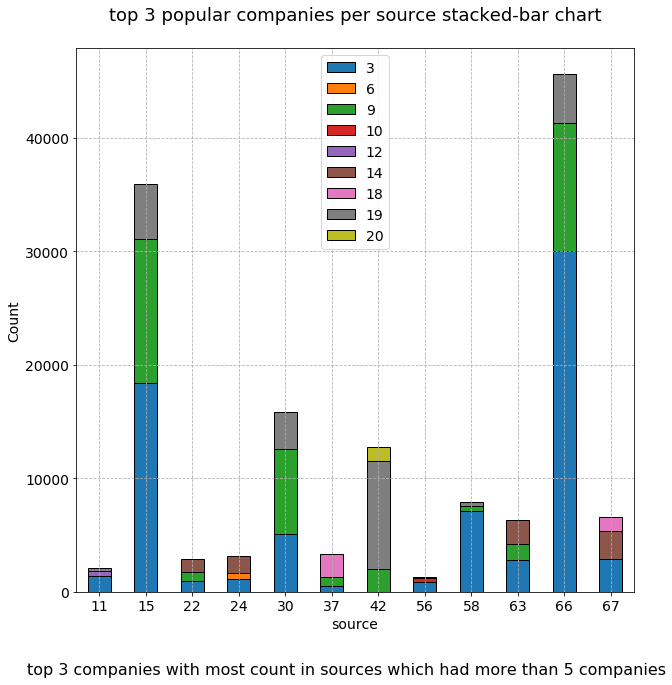

top 3 popular companies and their total count in each source is:


count
source company       
11     3         1427
       12         401
       19         318
15     3        18431
       9        12636
       19        4891
22     3          995
       9          752
       14        1180
24     3         1175
       6          483
       14        1475
30     3         5137
       9         7439
       19        3325
37     3          539
       9          818
       18        2002
42     9         2038
       19        9523
       20        1255
56     3          882
       10         353
       20         109
58     3         7163
       9          408
       19         344
63     3         2799
       9         1428
       14        2141
66     3        30072
       9        11248
       19        4289
67     3         2951
       14        2418
       18        1273

In [18]:
#2.2 - popularity per source

#seperate columns we need
filtered_D4 = D[['source','company']]

#how many times a company has been used totally each month
companies_count_per_source = filtered_D4.groupby(['source','company'])['source'].count().reset_index(name='count')

#seperate companies_count_per_month DataFrame into n DFs, one for each month, this is a list of DFs
df_source_count_list = [pd.DataFrame(y) for x, y in companies_count_per_source.groupby(['source'], as_index=False)]

#we need an empty DF to append clean data into, so we can plot it
company_count_source = pd.DataFrame(columns = ['source' , 'company' , 'count'])


#df_source_count_list is a list of DFs. we have to do some editing on each DF in this list
#since total source numbers is too much we neglect sources that had used less than 5 companies
#we've put the neglected sources and their companies in another DF before


for i in df_source_count_list:
    if i.shape[0] < 5:
        continue  
    i.sort_values(by = 'count' , ascending = False , inplace = True) #sort each DF in list
    i = i.head(3) #keep top 3 popular company in each month
    company_count_source = company_count_source.append(i , ignore_index=True) #append them all to this so we can plot it


#plot
company_count_source.pivot("source", "company", "count").plot(figsize=(10,10) , kind='bar', rot=0 , fontsize= 14 , stacked = True,edgecolor="black")
plt.xlabel('source' , fontsize= 14)
plt.legend(fontsize = 14)
plt.title('top 3 popular companies per source stacked-bar chart', fontsize = 18 , y = 1.04)
plt.figtext(0.5, 0.01, "top 3 companies with most count in sources which had more than 5 companies", wrap=True, horizontalalignment='center', fontsize=16)
plt.grid(b=None, which='major' , axis='both',linestyle='--')
plt.ylabel('Count', fontsize= 14)
plt.show()




#let's print a beautiful data table
printable_cnt_table_src = company_count_source.groupby(['source', 'company']).agg({'count':'sum'})
print('top 3 popular companies and their total count in each source is:')
printable_cnt_table_src



In [29]:
#let't quickly see how much companies were used in poor sources
display(poor_sorce['company'].value_counts().to_frame().reset_index().rename(columns = {'index':'company' ,'company': 'count'}))

,company,count
0,3,7
1,9,6
2,19,4
3,14,3
4,10,2
5,20,2
6,18,2
7,12,1
8,17,1
